# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA & Data Cleaning

In [4]:
# Displays all column names in the DataFrame
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Check the shape of the dataset to see how many samples (rows) and features (columns) are available for training
df.shape

(768, 9)

In [6]:
# Check for missing values in each column to ensure data completeness
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Display basic information about the dataset, including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Generate summary statistics for numerical columns such as mean, median, min, and max values
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Check for duplicate rows in the dataset to ensure data uniqueness
df.duplicated().sum()

0

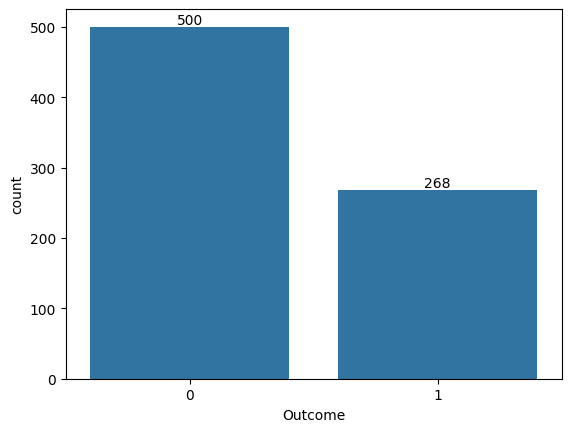

In [10]:
# Create a bar plot showing the count of each Outcome category (0 = non-diabetic, 1 = diabetic)
ax = sns.barplot(df['Outcome'].value_counts())
for container in ax.containers:
    ax.bar_label(container)

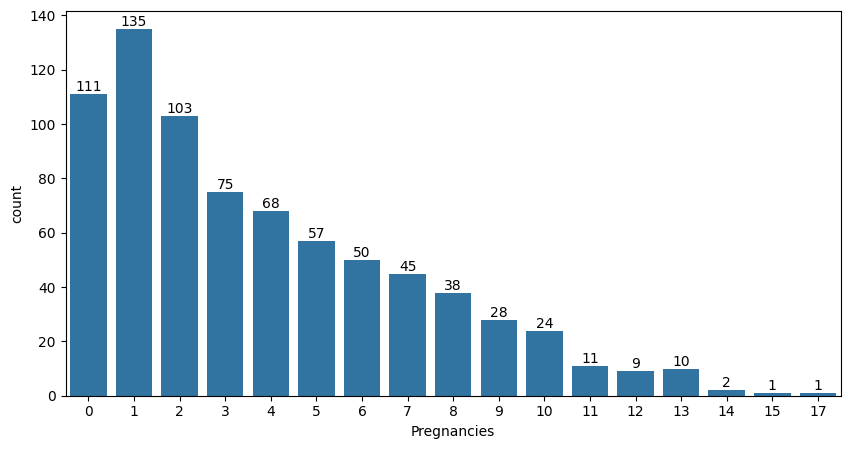

In [11]:
# Plot the distribution of pregnancy counts among individuals
plt.figure(figsize=(10,5))
ax = sns.barplot(df['Pregnancies'].value_counts())
for container in ax.containers:
    ax.bar_label(container)

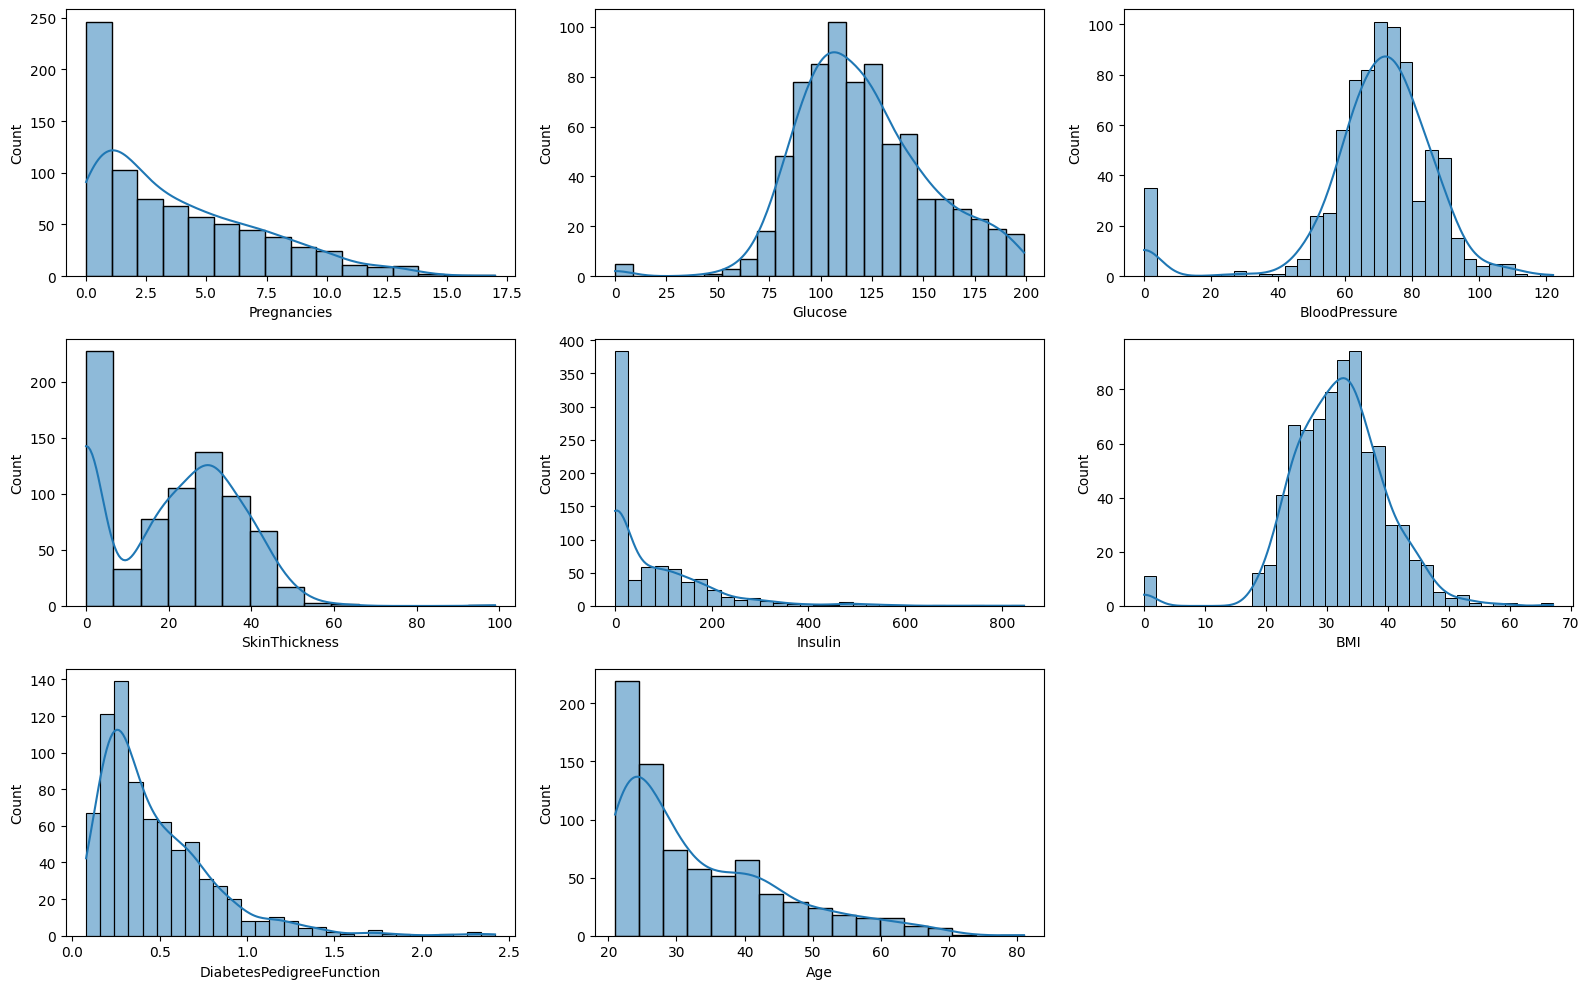

In [12]:
# Plot histograms with KDE (Kernel Density Estimation) for all numerical features
# This helps visualize the distribution and spread of each variable
plt.figure(figsize=(16,10))
def plotting(var,num):
    plt.subplot(3,3,num)
    sns.histplot(df[var],kde=True)

plotting('Pregnancies',1)
plotting('Glucose',2)
plotting('BloodPressure',3)
plotting('SkinThickness',4)
plotting('Insulin',5)
plotting('BMI',6)
plotting('DiabetesPedigreeFunction',7)
plotting('Age',8)


plt.tight_layout()

<Axes: ylabel='Glucose'>

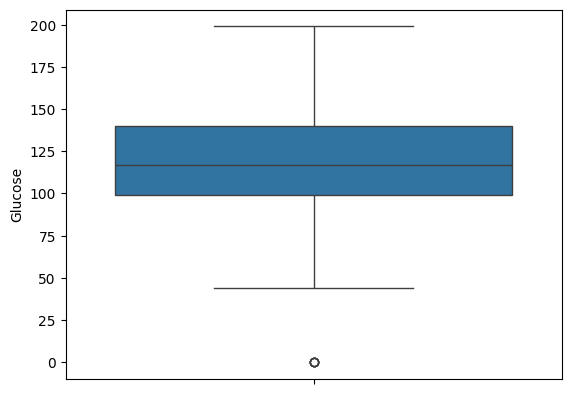

In [13]:
# Create a box plot to visualize the distribution of glucose levels and detect outliers
sns.boxplot(df['Glucose'])

In [14]:
# Calculate the average glucose level excluding zero values (which are invalid)
Glucose_mean = df[df['Glucose'] != 0]['Glucose'].mean().round()
Glucose_mean

122.0

In [15]:
# Replace all zero values in the 'Glucose' column with the calculated mean glucose level
df['Glucose'] = df['Glucose'].replace(0,Glucose_mean)

<Axes: ylabel='BloodPressure'>

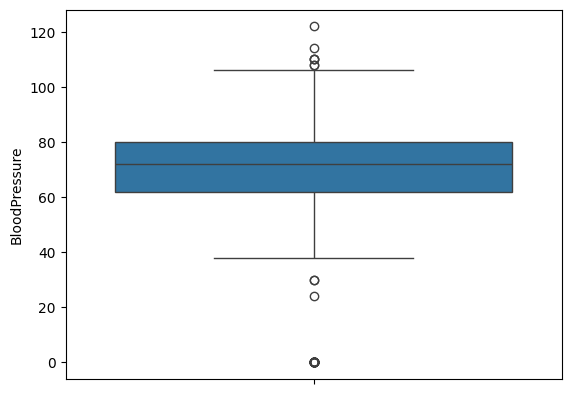

In [16]:
# Create a box plot to visualize the distribution of Blood Pressure levels and detect outliers
sns.boxplot(df['BloodPressure'])

In [17]:
# Calculate the mean blood pressure by excluding values less than or equal to 40 (considered unrealistic)
BP_mean = df[df['BloodPressure'] > 40]['BloodPressure'].mean()
BP_mean

72.67994505494505

In [18]:
# Replace blood pressure values less than or equal to 40 with the calculated mean blood pressure
df['BloodPressure'] = df['BloodPressure'].mask(df['BloodPressure'] <= 40,BP_mean)

<Axes: ylabel='SkinThickness'>

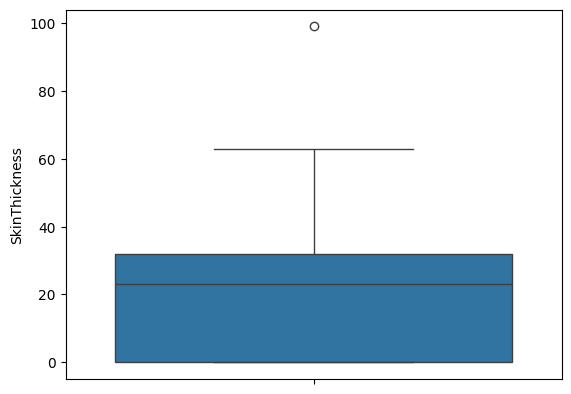

In [19]:
# Create a box plot to visualize the distribution of SkinThickness and detect outliers
sns.boxplot(df['SkinThickness'])

In [20]:
# Calculate the median skin thickness, ignoring zero values which indicate missing data
ST_median = df[df['SkinThickness'] != 0]['SkinThickness'].median()
ST_median

29.0

In [21]:
# Replace zero values in the 'SkinThickness' column with the calculated median value
df['SkinThickness'] = df['SkinThickness'].replace(0, ST_median)

<Axes: ylabel='Insulin'>

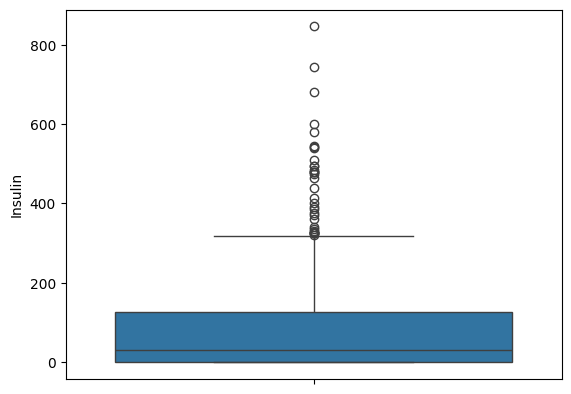

In [22]:
# Create a box plot to visualize the distribution of Insulin and detect outliers
sns.boxplot(df['Insulin'])

In [23]:
# Calculate the mean insulin level, excluding zeros and extremely high values (above 400) considered outliers
Insulin_mean = df[(df['Insulin'] != 0) & (df['Insulin'] <= 400)]['Insulin'].mean().round()
Insulin_mean

135.0

In [24]:
# Replace zero or abnormally high insulin values (above 400) with the calculated mean insulin level
df['Insulin'] = df['Insulin'].mask((df['Insulin'] == 0) | (df['Insulin'] > 400), Insulin_mean)

<Axes: ylabel='BMI'>

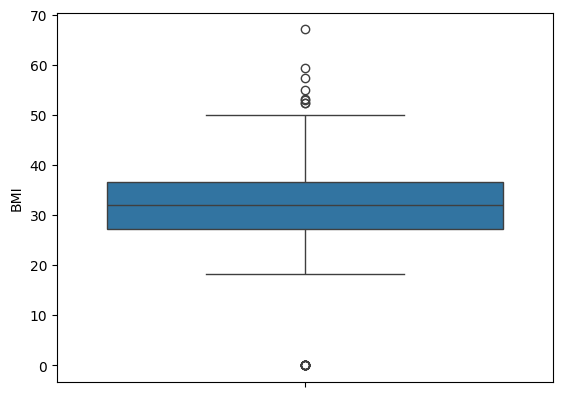

In [25]:
# Create a box plot to visualize the distribution of BMI and detect outliers
sns.boxplot(df['BMI'])

In [26]:
# Calculate the median BMI, excluding zero and extremely high values (above 70) treated as outliers
BMI_mean = df[(df['BMI'] != 0) & (df['BMI'] < 70)]['BMI'].median()
BMI_mean

32.3

In [27]:
# Replace invalid BMI values (≤ 0) and unrealistic high values (> 65) with the calculated median BMI
df['BMI'] = df['BMI'].mask((df['BMI'] <= 0) | (df['BMI'] > 65),BMI_mean)

<Axes: ylabel='DiabetesPedigreeFunction'>

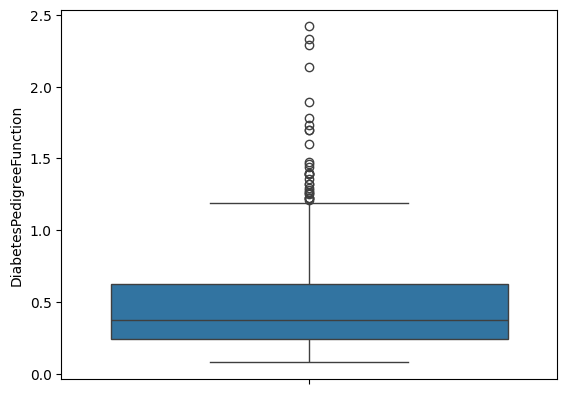

In [28]:
# Create a box plot to visualize the distribution of DPF and detect outliers
sns.boxplot(df['DiabetesPedigreeFunction'])

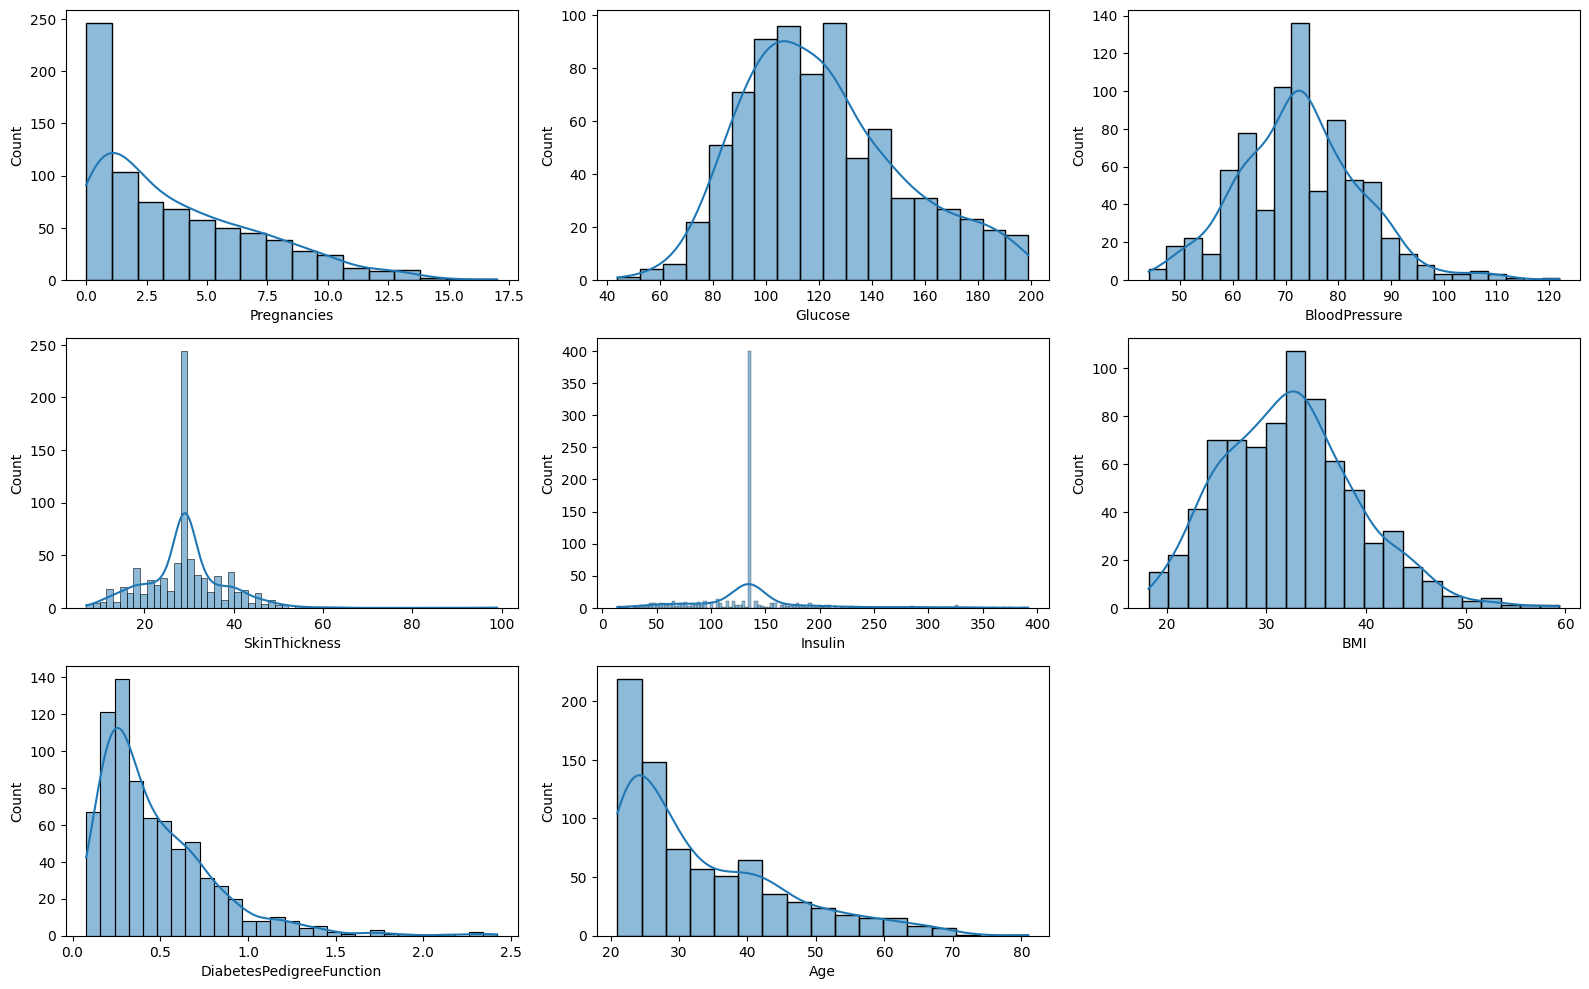

In [29]:
plt.figure(figsize=(16,10))
def plotting(var,num):
    plt.subplot(3,3,num)
    sns.histplot(df[var],kde=True)

plotting('Pregnancies',1)
plotting('Glucose',2)
plotting('BloodPressure',3)
plotting('SkinThickness',4)
plotting('Insulin',5)
plotting('BMI',6)
plotting('DiabetesPedigreeFunction',7)
plotting('Age',8)


plt.tight_layout()

In [30]:
# Create an 'AgeGroup' column by categorizing ages into defined ranges for better analysis
df['AgeGroup'] = pd.cut(df['Age'], bins = [20, 30, 40, 50, 60, 100], labels=['20-30', '30-40', '40-50', '50-60', '60+'])

In [31]:
# Create a 'BMI_Category' column to classify individuals based on BMI ranges into Underweight, Normal, Overweight, and Obese groups
df['BMI_Category'] = pd.cut(df['BMI'],bins=[0, 18.5, 25, 30, 100],labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [32]:
# Categorize glucose levels into Normal, Prediabetic, and Diabetic ranges based on medical thresholds
df['GlucoseCategory'] = pd.cut(df['Glucose'],bins=[0,100,125,250], labels=['Normal','Prediabetic','Diabetic'])

<Axes: xlabel='AgeGroup', ylabel='count'>

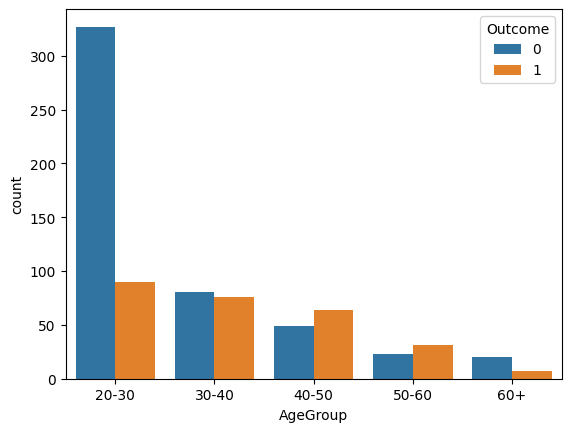

In [33]:
# Plot the count of diabetes outcomes across different age groups to observe age-related patterns
sns.countplot(x=df['AgeGroup'],hue=df['Outcome'])

<Axes: xlabel='BMI_Category', ylabel='count'>

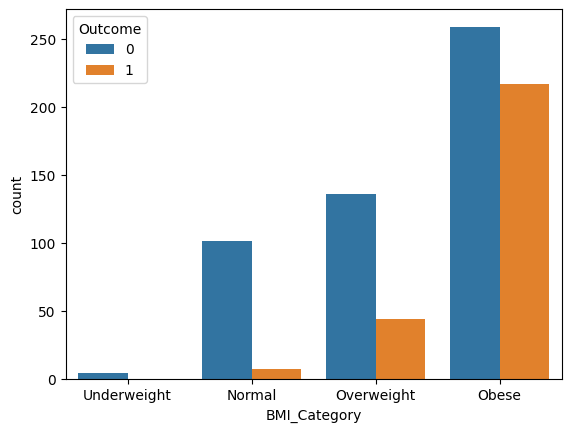

In [34]:
# Plot the count of diabetes outcomes across different BMI categories to analyze the impact of body weight on diabetes
sns.countplot(x=df['BMI_Category'],hue=df['Outcome'])

<Axes: xlabel='GlucoseCategory', ylabel='count'>

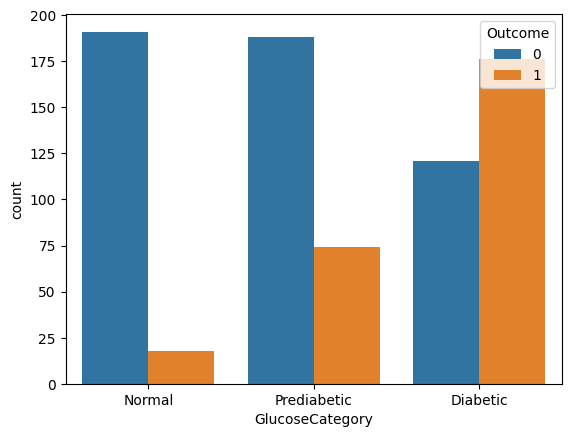

In [35]:
# Plot the count of diabetes outcomes across different glucose level categories to examine the relationship between glucose and diabetes
sns.countplot(x=df['GlucoseCategory'],hue=df['Outcome'])

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_Category,GlucoseCategory
0,6,148,72.000000,35,135,33.6,0.627,50,1,40-50,Obese,Diabetic
1,1,85,66.000000,29,135,26.6,0.351,31,0,30-40,Overweight,Normal
2,8,183,64.000000,29,135,23.3,0.672,32,1,30-40,Normal,Diabetic
3,1,89,66.000000,23,94,28.1,0.167,21,0,20-30,Overweight,Normal
4,0,137,72.679945,35,168,43.1,2.288,33,1,30-40,Obese,Diabetic


<Axes: >

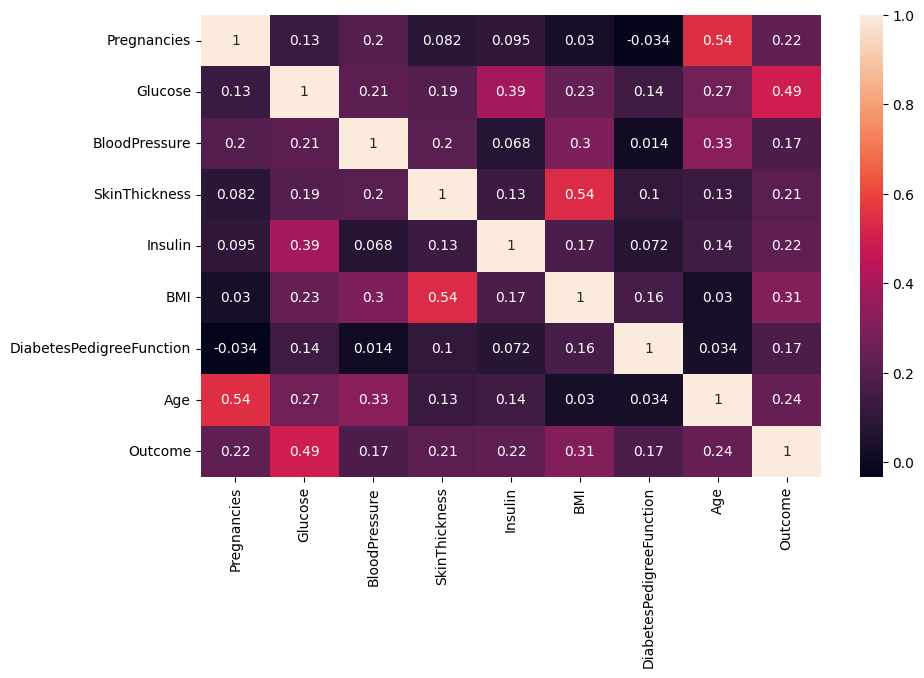

In [37]:
# Create a heatmap to visualize the correlation between numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [38]:
# Drop the categorical feature columns since they were created only for analysis and are not needed for model training
df = df.drop(['AgeGroup', 'BMI_Category', 'GlucoseCategory'], axis=1)

# Spliting Data

In [39]:
# Split the dataset into training and testing sets
# X contains all features, y contains the target variable (Outcome)
# 80% of the data is used for training and 20% for testing
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
# This generates synthetic samples for the minority class to balance the dataset
# Then, split the resampled data into training (80%) and testing (20%) sets with stratification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [41]:
# Train a LightGBM classifier — an efficient gradient boosting algorithm for classification tasks
# The parameters control learning rate, tree depth, and number of estimators
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm = LGBMClassifier(
    learning_rate=0.01,
    max_depth=8,
    n_estimators=400,
    random_state=42
)

lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

LGBMClassifier(learning_rate=0.01, max_depth=8, n_estimators=400,
               random_state=42)

In [42]:
# Make predictions on the test data using the trained LightGBM model
# Calculate and print the model's accuracy percentage
y_pred = lgbm.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred) * 100)

LightGBM Accuracy: 85.0


In [43]:
# Evaluate the model's performance using a confusion matrix and classification report
# The confusion matrix shows correct and incorrect predictions
# The classification report provides precision, recall, f1-score, and support for each class
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83 17]
 [13 87]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       100
           1       0.84      0.87      0.85       100

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



In [44]:
# Save the trained LightGBM model as a .pkl file using joblib for future use (like deployment)
import joblib
joblib.dump(lgbm, 'lightgbm_model.pkl')
print("✅ Model saved successfully!")

✅ Model saved successfully!
